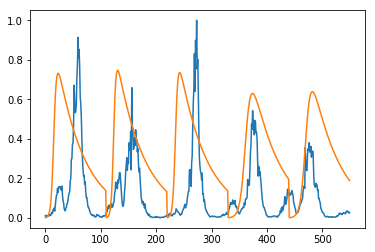

In [40]:
import numpy as np
import matplotlib.pyplot as plt
with open("/Users/gcgibson/Stein-Variational-Gradient-Descent/python/dat.json") as f:
    dat = f.read()
    
    
    dat = dat.split(",")
    time = []
    cases = []
    count = 0
    for elm in dat:
        if count % 2 ==0:
            time.append(elm.split(":")[1])
        else:
            cases.append(int(elm.split(":")[1].replace("}","").replace(']"]\n',"")))
        count +=1


cases = np.array(cases)

cases = cases/(1.0*np.max(cases))

beta0 = .1

def fa(a,b,c,alpha,beta):
    return -beta*a*b 
def fb(a,b,c,alpha,beta):
    return beta*a*b - alpha*b 
def fc(a,b,c,alpha,beta):
    return alpha*b

def rK3(a, b, c, fa, fb, fc, hs,alpha,beta,sigma,p,t):
       
    a1 = fa(a, b, c, alpha, beta)*hs
    b1 = fb(a, b, c, alpha, beta)*hs
    c1 = fc(a, b, c, alpha, beta)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(ak, bk, ck, alpha, beta)*hs
    b2 = fb(ak, bk, ck, alpha, beta)*hs
    c2 = fc(ak, bk, ck, alpha, beta)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(ak, bk, ck, alpha, beta)*hs
    b3 = fb(ak, bk, ck, alpha, beta)*hs
    c3 = fc(ak, bk, ck, alpha, beta)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(ak, bk, ck, alpha, beta)*hs
    b4 = fb(ak, bk, ck, alpha, beta)*hs
    c4 = fc(ak, bk, ck, alpha, beta)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

def forward_sample(theta):
    gamma = theta[0]
    beta = theta[1]
    a, b, c, hs = .9, .001, 0, .2
    a_arr = []
    b_arr = []
    c_arr = []
    for i in range(110):
        a, b, c = rK3(a, b, c, fa, fb, fc, hs, gamma, beta,0,0,i)
        a_arr.append(a)
        b_arr.append(b)
        c_arr.append(c)
    return b_arr



### ar on beta
seasons = 5
total_results = []
beta = 1.9
for s in range(seasons):
    beta += np.random.normal(0,1)
    total_results += forward_sample([.1,beta])
plt.plot(cases[:seasons*110])

plt.plot(total_results)
plt.show()

In [7]:

import emcee
from scipy.stats import norm


def distance_abc(theta):
    theta_0 = np.exp(theta[0])
    theta_1 = np.exp(theta[1])

    tmp = 1./np.sqrt(2*pi*sd)*np.exp(-np.sum(np.power((np.array(forward_sample([theta_0,theta_1,theta_2,110]))-cases),2)))
    ret_val = tmp*norm.pdf(theta,0,10)
    if np.isnan(ret_val).any():
        ret_val = -10000000*np.ones(2)
    #print (ret_val.shape)
    return ret_val.sum()

from scipy.stats import gamma
import numpy as np

def rq():
    return np.random.gamma(1)
def q(x):
    return gamma.pdf(x,1)


samples = []
x_0_beta = rq()
x_0_


0.0


In [4]:
import matplotlib.pyplot as plt

print (np.mean(np.exp(samples[:,0])))
plt.hist(np.exp(samples[:,0]))
plt.show()
print (np.mean(np.exp(samples[:,1])))
plt.hist(np.exp(samples[:,1]))
plt.show()
print (np.mean(samples[:,2]))
plt.hist(samples[:,2])
plt.show()
print (np.mean(samples[:,3]))
plt.hist(samples[:,3])
plt.show()

NameError: name 'samples' is not defined

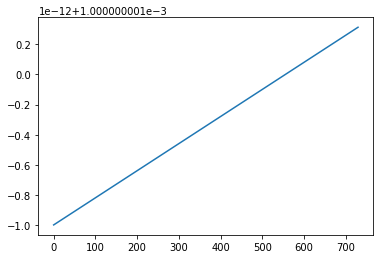

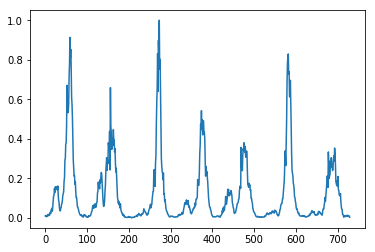

In [28]:
alpha =  np.mean(np.exp(samples[:,0]))
beta = np.mean(np.exp(samples[:,1]))
sigma = np.mean(np.exp(samples[:,2]))
p = np.mean(samples[:,2])
plt.plot(forward_sample([alpha,beta,sigma,p]))
plt.show()
plt.plot(cases)
plt.show()